# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
combined_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Checking the number of mice.
unique_mice = combined_mouse_study["Mouse ID"].unique()
number_of_mice = unique_mice.__len__()
number_of_mice


249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mask = combined_mouse_study.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicates = combined_mouse_study.loc[mask, 'Mouse ID'].unique()

print("Duplicate Mouse IDs: ", duplicates)

Duplicate Mouse IDs:  ['g989']


In [25]:
duplicates

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = combined_mouse_study.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

clean_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice = clean_mouse_study['Mouse ID'].nunique()

# Print the number of unique mice in the clean dataset
print("Number of unique mice in the clean dataset: ", num_unique_mice)

Number of unique mice in the clean dataset:  249


## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_summary = clean_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename columns 
drug_regimen_summary = drug_regimen_summary.rename(columns={'mean': 'Mean Tumor Volume',
                                                            'median': 'Median Tumor Volume',
                                                            'var': 'Tumor Volume Variance',
                                                            'std': 'Tumor Volume Std. Dev.',
                                                            'sem': 'Tumor Volume Std. Err.'})

drug_regimen_summary



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

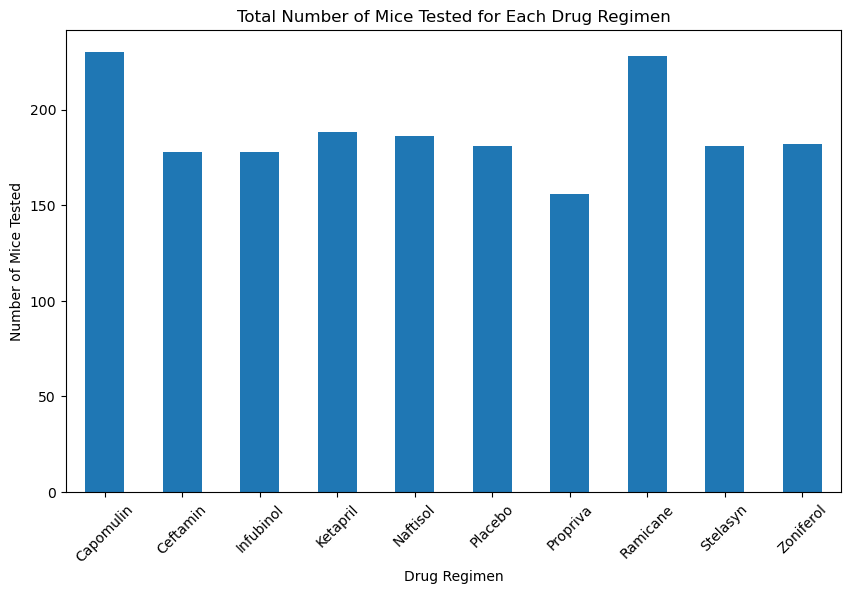

In [20]:
# Group the clean_mouse_study dataframe by drug regimen and mouse ID, and count the number of timepoints for each group
timepoint_counts = clean_mouse_study.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].count()

# Count the total number of timepoints 
regimen_timepoint_counts = timepoint_counts.groupby('Drug Regimen').sum()


ax = regimen_timepoint_counts.plot(kind='bar', figsize=(10, 6), rot=45)

# Set the title labels
ax.set_title('Total Number of Mice Tested for Each Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Number of Mice Tested')

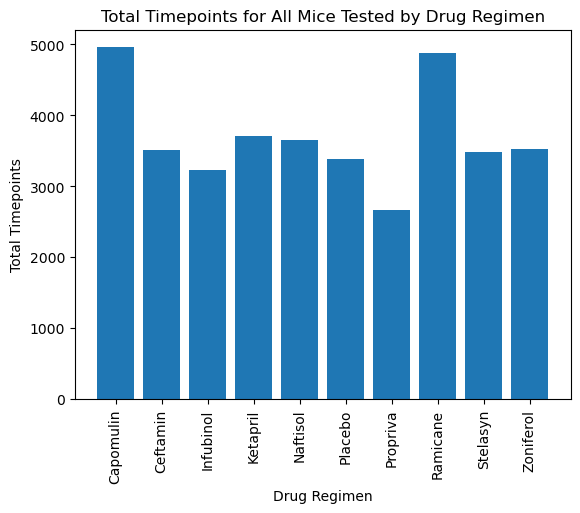

In [29]:
regimen_timepoint_counts = clean_mouse_study.groupby('Drug Regimen')['Timepoint'].sum()

# Create a bar plot using pyplot
plt.bar(regimen_timepoint_counts.index, regimen_timepoint_counts.values)

# Add axis labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Total Timepoints')
plt.title('Total Timepoints for All Mice Tested by Drug Regimen')
plt.xticks(rotation=90)

plt.show()

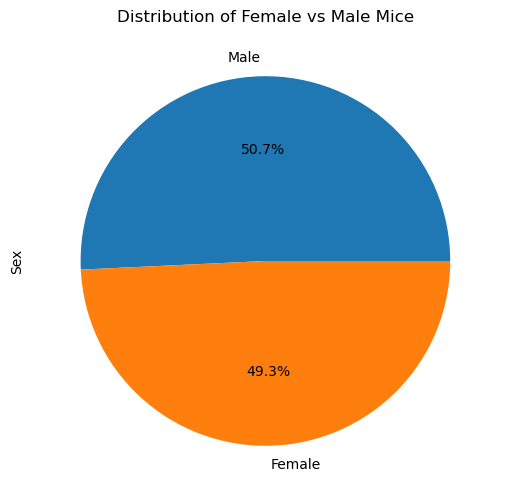

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_mouse_study["Sex"].value_counts()

# Plot the pie chart
sex_counts.plot(kind="pie", figsize=(6, 6), autopct="%1.1f%%")
plt.title("Distribution of Female vs Male Mice")

plt.show()


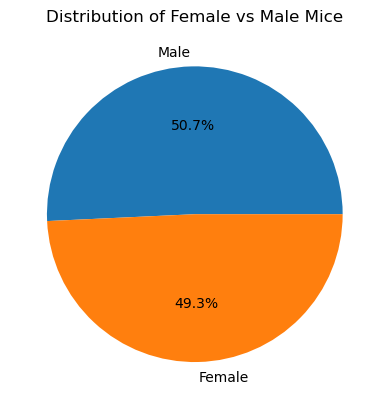

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = clean_mouse_study["Sex"].value_counts()

# Plot the pie chart
plt.pie(sex_counts, labels=sex_counts.index, autopct="%1.1f%%")
plt.title("Distribution of Female vs Male Mice")

plt.show()


## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = clean_mouse_study.groupby("Mouse ID")["Timepoint"].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoints, clean_mouse_study, on=["Mouse ID", "Timepoint"])

final_tumor_volumes = merged_df.loc[merged_df["Drug Regimen"].isin(treatments), ["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]

final_tumor_volumes.head()


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
3,a275,Ceftamin,62.999356
6,a411,Ramicane,38.407618
7,a444,Ramicane,43.047543


In [48]:
tumor_vols = []

# Loop through treatments
for treatment in treatments:
    treatment_df = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_vols.append(treatment_df)
    
    # Determine outliers
    quartiles = treatment_df.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = treatment_df.loc[(treatment_df < lower_bound) | (treatment_df > upper_bound)]
    
    # Print results
    print(f"{treatment}:")
    print(f"Interquartile range: {iqr:.2f}")
    print(f"Median: {quartiles[0.5]:.2f}")
    print(f"Values below {lower_bound:.2f} could be outliers.")
    print(f"Values above {upper_bound:.2f} could be outliers.")
    print(f"Number of outliers: {len(outliers)}\n")
 


Capomulin:
Interquartile range: 7.31
Median: 41.56
Values below 26.71 could be outliers.
Values above 55.97 could be outliers.
Number of outliers: 2

Ramicane:
Interquartile range: 8.33
Median: 40.67
Values below 24.19 could be outliers.
Values above 57.49 could be outliers.
Number of outliers: 1

Infubinol:
Interquartile range: 10.00
Median: 51.82
Values below 32.31 could be outliers.
Values above 72.32 could be outliers.
Number of outliers: 0

Ceftamin:
Interquartile range: 9.59
Median: 51.78
Values below 32.82 could be outliers.
Values above 71.19 could be outliers.
Number of outliers: 0



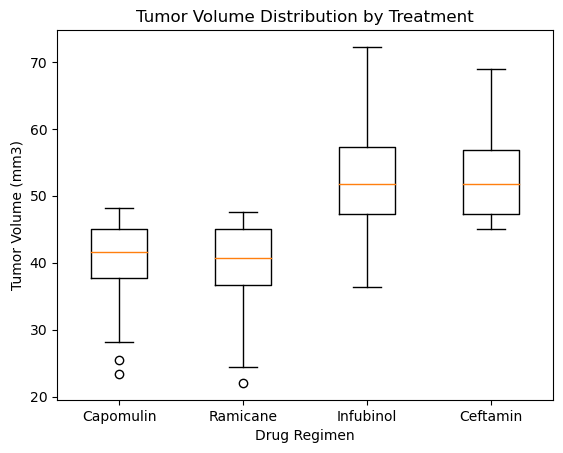

In [66]:
tumor_vols = []
# Loop through treatments
for treatment in treatments:
    treatment_df = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_vols.append(treatment_df)
    
fig, ax = plt.subplots()

# Plot the tumor volumes
ax.boxplot(tumor_vols)

# Set the title and labels
ax.set_title('Tumor Volume Distribution by Treatment')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xticklabels(treatments)

# Show the plot
plt.show()

## Line and Scatter Plots

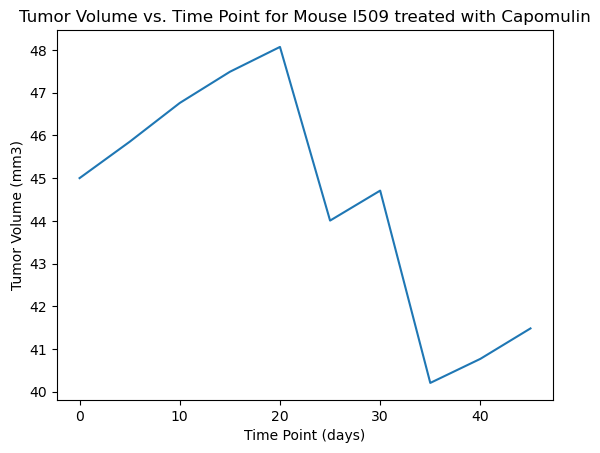

In [69]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_id = 'l509'

# Filter the clean_mouse_study dataframe for the chosen mouse ID and Capomulin treatment
mouse_data = clean_mouse_study.loc[(clean_mouse_study['Mouse ID'] == mouse_id) & (clean_mouse_study['Drug Regimen'] == 'Capomulin')]

# Set the x-axis as the timepoints and the y-axis as the tumor volumes
x_axis = mouse_data['Timepoint']
y_axis = mouse_data['Tumor Volume (mm3)']

# Plot the tumor volume vs. time point as a line plot
plt.plot(x_axis, y_axis)

# Set the title and labels for the plot
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} treated with Capomulin')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

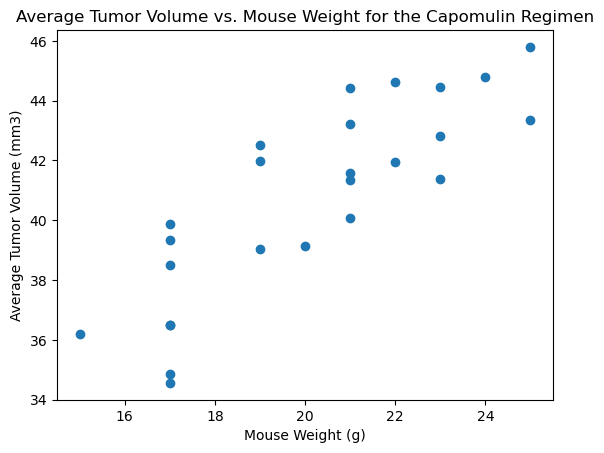

In [70]:
capomulin_data = clean_mouse_study[clean_mouse_study['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume and mouse weight for each mouse ID
grouped_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

# Set the x-axis as the mouse weight and the y-axis as the average tumor volume
x_axis = grouped_data['Weight (g)']
y_axis = grouped_data['Tumor Volume (mm3)']

# Create a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(x_axis, y_axis)

# Set the title and labels for the plot
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()


## Correlation and Regression

y = 1.33x + 16.25
R^2 = 0.35


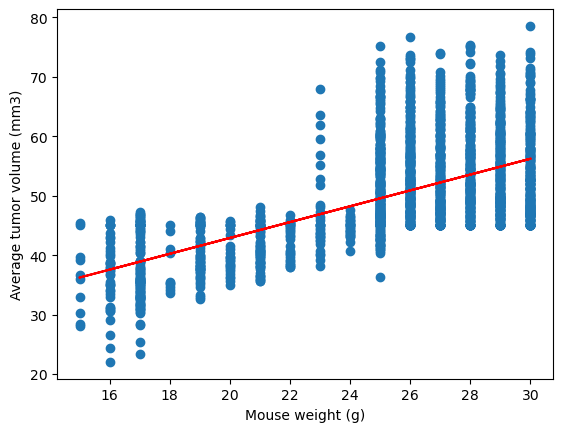

In [77]:
slope, intercept, r_value, p_value, std_err = st.linregress(clean_mouse_study['Weight (g)'], clean_mouse_study['Tumor Volume (mm3)'])

# Create scatter plot
plt.scatter(clean_mouse_study['Weight (g)'], clean_mouse_study['Tumor Volume (mm3)'])
plt.xlabel('Mouse weight (g)')
plt.ylabel('Average tumor volume (mm3)')

# Add regression line
x = clean_mouse_study['Weight (g)']
y = slope * x + intercept
plt.plot(x, y, color='red')

# Add equation and R^2 value to plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
r_squared = f'R^2 = {r_value**2:.2f}'
print(equation)
print(r_squared)

plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


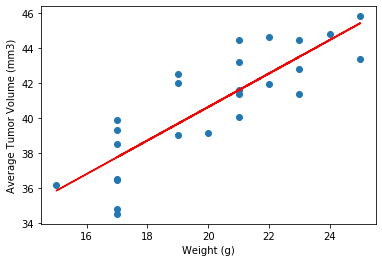

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

